## Notebook to run Radiative/Adiabatic cooling ratio analysis, Section 5.1 of the paper, Figure 8 and Figure 9

In [1]:
from jetset.jet_timedep import JetTimeEvol
from jetset.jetkernel.jetkernel import Sync_tcool
from astropy.table import Table
from astropy import  constants as const
import glob
import pickle
import numpy as np

In [2]:
file_list=glob.glob('temp_ev_sim_exp_change_beta/temp_ev_expansion_beta_exp=*.pkl')
file_list_lcs=glob.glob('temp_ev_sim_exp_change_beta/lc_obs_beta_exp=*.pkl')
file_list.sort()
file_list_lcs.sort()
t=Table.read('temp_ev_analysis_beta_exp_trends/gamma_radio_delay_fit_vs_beta_exp.ecsv')


In [3]:
t

beta_exp,delta_T,delta_T_conv,delta_T_conv_err,t_decay,t_decay_conv,t_decay_conv_err,t_rise_conv,t_rise_conv_err,t_peak_radio,t_peak_gamma,A,A_err
1 / c,d,d,d,d,d,d,d,d,d,d,,
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
0.001,115.25462962962962,115.40595460540816,2.4216399127816643,104.07370129384981,104.07370129384981,1.9732450400899102,63.58932913401256,3.23197837574311,115.34722222222221,0.09259259259259259,1.2088750481108728e-25,7.316524166691227e-28
0.0018846716378431187,70.65972222222221,70.96111363200801,0.8863497298194851,72.61832702651944,72.61832702651944,1.121650423915811,38.637931768170624,1.9689507214995887,70.75231481481481,0.09259259259259259,6.560307719317904e-26,4.61543545426573e-28
0.003551987182490267,41.45833333333333,41.64493067614699,0.3465457906976734,47.339707892393214,47.339707892393214,0.6422421657061719,22.104208745230135,1.1283548485899992,41.550925925925924,0.09259259259259259,3.872465716325702e-26,2.536708865666542e-28
0.006694329500821696,24.46759259259259,24.439298446177467,0.14750866752803415,28.685974632232362,28.685974632232362,0.3611393580737646,12.089799541602064,0.6176463743767776,24.560185185185183,0.09259259259259259,2.029991877418943e-26,1.209367639924975e-28
0.01261661294457514,15.081018518518517,14.949556373586576,0.06904366925529412,16.45390361567345,16.45390361567345,0.19987535327992453,6.460085566694228,0.3302416181743242,15.17361111111111,0.09259259259259259,1.0873752791805536e-26,6.123313121844155e-29
0.023778172582285134,10.034722222222221,9.860690188571006,0.044682511858758815,9.109765940400797,9.109765940400797,0.11951847002511409,3.4177622352053434,0.1773913880761527,10.127314814814815,0.09259259259259259,9.927793968585374e-27,7.067258419833776e-29
0.04481404746557166,7.337962962962963,7.156427956292841,0.031058871397208556,4.935643281342942,4.935643281342942,0.0741480475243443,1.7914623440259707,0.09563058764115272,7.430555555555555,0.09259259259259259,9.823316075547992e-27,9.361829901402687e-29
0.08445976423531824,5.914351851851851,5.720781702634634,0.021531894739353546,2.6268575529690557,2.6268575529690557,0.04710020842783324,0.9178151298948195,0.05154234511051625,6.006944444444444,0.09259259259259259,9.799372774697517e-27,1.2538270701480283e-28


In [4]:
def get_gamma_t(nu_t,B,beaming,z):
    q_esu=4.803206815e-10
    
    nu_L=q_esu*B/(2*np.pi*const.m_e.cgs*const.c.cgs)
    
    return np.sqrt((3*nu_t*(z+1)/beaming)/(4*nu_L.value))
    

beta 0.001 time_max = 114.94212962962963 gamma 42.96063502522083 B 0.07482083888770043 R 1.3365260465749564 t_ad4.458171e+08 t_s6.479545e+10 t_S/t_ad 1.453409e+02
beta 0.001 time_max_1= 271.05268157040433 gamma_1 58.91558347692665 B 1 0.03978355528165737 R 1 2.513601393641811 t_ad8.384472e+08 t_s4.723618e+10 t_S/t_ad 5.633769e+01
beta 0.001 time_max_2= 10.769651073910975 gamma_2 63.34711749223942 B 2 0.03441202598333401 R 2 2.513601393641811 t_ad9.693242e+08 t_s4.393000e+10 t_S/t_ad 4.532023e+01
beta 0.002 time_max = 70.34722222222223 gamma 44.63884488538761 B 0.06930077030499193 R 1.4429854034796596 t_ad2.553910e+08 t_s6.235689e+10 t_S/t_ad 2.441625e+02
beta 0.002 time_max_1= 179.27471276200137 gamma_1 64.26817864003173 B 1 0.03343274019114078 R 1 2.9910799841198377 t_ad5.293850e+08 t_s4.330007e+10 t_S/t_ad 8.179315e+01
beta 0.002 time_max_2= 7.186129209175369 gamma_2 69.5842285288623 B 2 0.028519527398960666 R 2 2.9910799841198377 t_ad6.205850e+08 t_s3.999064e+10 t_S/t_ad 6.444022e+0

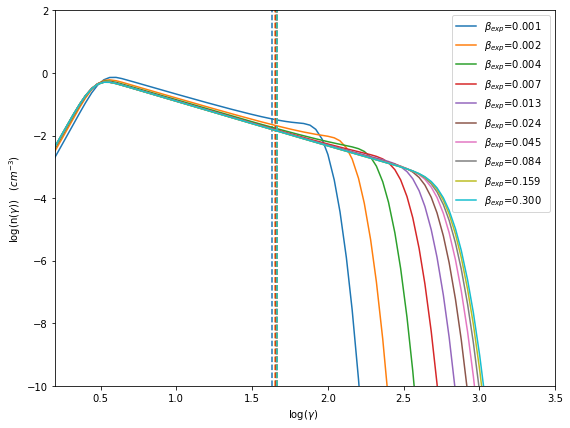

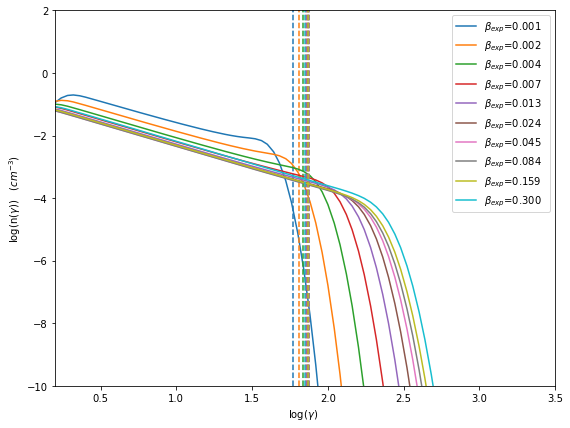

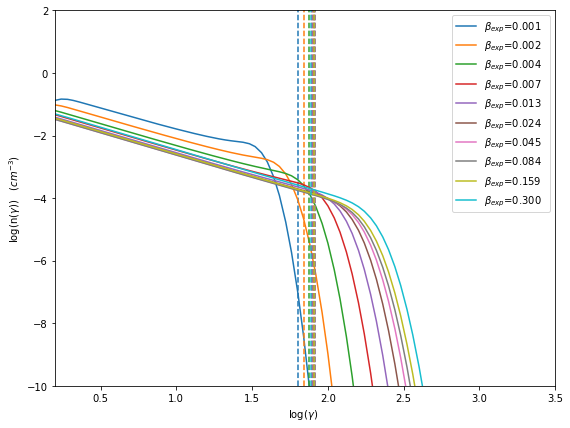

In [5]:
B=np.zeros(len(file_list))
R=np.zeros(len(file_list))
gamma=np.zeros(len(file_list))
t_max=np.zeros(len(file_list))
t_ad=np.zeros(len(file_list))
t_S=np.zeros(len(file_list))
beta_exp=np.zeros(len(file_list))

B_1=np.zeros(len(file_list))
R_1=np.zeros(len(file_list))
gamma_1=np.zeros(len(file_list))
t_ad_1=np.zeros(len(file_list))
t_S_1=np.zeros(len(file_list))


B_2=np.zeros(len(file_list))
R_2=np.zeros(len(file_list))
gamma_2=np.zeros(len(file_list))
t_ad_2=np.zeros(len(file_list))
t_S_2=np.zeros(len(file_list))
t_factor=1.5
t_factor_1=2.0

p=None
p1=None
p2=None
nu1=1.5E10
for ID,f in enumerate(file_list):
    temp_ev=JetTimeEvol.load_model(f)
    beta_exp[ID]=temp_ev.parameters.beta_exp_R.val
    nu1=15*1E9
    beaming=temp_ev.rad_region.jet.parameters.beam_obj.val
    z=temp_ev.rad_region.jet.parameters.z_cosm.val
    with open(file_list_lcs[ID], 'rb') as f:
        lcs=pickle.load(f)
        lc=lcs['lr_obs_%1.0fGHz'%(nu1/1E9)]
    
    t_max[ID]=lc['time'][np.argmax(lc['flux'])]
    t_dec=t['t_decay_conv'][ID]
    temp_ev.rad_region.set_time(time=t_max[ID],frame='obs')
    p=temp_ev.rad_region.jet.emitters_distribution.plot(label=r'$\beta_{exp}$=%3.3f  '%beta_exp[ID],p=p)
    B[ID]=temp_ev.rad_region.jet.parameters.B.val
    gamma[ID]=get_gamma_t(nu1,B[ID],beaming,z)
    R[ID]=temp_ev.rad_region.jet.parameters.R.val/1E16
    t_ad[ID]=temp_ev._get_adiab_cooling_time_from_R(R[ID]*1E16)
    t_S[ID]=Sync_tcool(temp_ev.rad_region.jet._blob, gamma[ID])
    p.ax.axvline(np.log10(gamma[ID]),color='C%d'%ID,ls='--')
    print("beta %3.3f"%beta_exp[ID],"time_max =",t_max[ID]/86400,"gamma",gamma[ID],"B",B[ID],"R",R[ID],"t_ad%e"%t_ad[ID],"t_s%e"%t_S[ID],"t_S/t_ad %e"%(t_S[ID]/t_ad[ID]))
    
    tmax_1=t_max[ID]+(t_dec*t_factor)*86400
    temp_ev.rad_region.set_time(time=tmax_1,frame='obs')
    p1=temp_ev.rad_region.jet.emitters_distribution.plot(label=r'$\beta_{exp}$=%3.3f  '%beta_exp[ID],p=p1)
    B_1[ID]=temp_ev.rad_region.jet.parameters.B.val
    gamma_1[ID]=get_gamma_t(nu1,B_1[ID],beaming,z)
    R_1[ID]=temp_ev.rad_region.jet.parameters.R.val/1E16
    t_ad_1[ID]=temp_ev._get_adiab_cooling_time_from_R(R_1[ID]*1E16)
    t_S_1[ID]=Sync_tcool(temp_ev.rad_region.jet._blob, gamma_1[ID])
    p1.ax.axvline(np.log10(gamma_1[ID]),color='C%d'%ID,ls='--')
    print("beta %3.3f"%beta_exp[ID],"time_max_1=",tmax_1/86400,"gamma_1",gamma_1[ID],"B 1",B_1[ID],"R 1",R_1[ID],"t_ad%e"%t_ad_1[ID],"t_s%e"%t_S_1[ID],"t_S/t_ad %e"%(t_S_1[ID]/t_ad_1[ID]))

    tmax_1=t_max[ID]+(t_dec*t_factor_1)*86400
    temp_ev.rad_region.set_time(time=tmax_1,frame='obs')
    p2=temp_ev.rad_region.jet.emitters_distribution.plot(label=r'$\beta_{exp}$=%3.3f  '%beta_exp[ID],p=p2)
    B_2[ID]=temp_ev.rad_region.jet.parameters.B.val
    gamma_2[ID]=get_gamma_t(nu1,B_2[ID],beaming,z)
    R_2[ID]=temp_ev.rad_region.jet.parameters.R.val/1E16
    t_ad_2[ID]=temp_ev._get_adiab_cooling_time_from_R(R_2[ID]*1E16)
    t_S_2[ID]=Sync_tcool(temp_ev.rad_region.jet._blob, gamma_2[ID])
    p2.ax.axvline(np.log10(gamma_2[ID]),color='C%d'%ID,ls='--')
    print("beta %3.3f"%beta_exp[ID],"time_max_2=",tmax_1/86400/beaming,"gamma_2",gamma_2[ID],"B 2",B_2[ID],"R 2",R_1[ID],"t_ad%e"%t_ad_2[ID],"t_s%e"%t_S_2[ID],"t_S/t_ad %e"%(t_S_2[ID]/t_ad_2[ID]))
    

p.rescale(y_min=-10,y_max=2,x_max=3.5,x_min=0.2)
p1.rescale(y_min=-10,y_max=2,x_max=3.5,x_min=0.2)
p2.rescale(y_min=-10,y_max=2,x_max=3.5,x_min=0.2)

In [6]:
p.fig.set_size_inches(6,4.5)
p.fig.set_dpi(150)

p.fig.savefig('temp_ev_analysis_beta_exp_trends/emitters_evol.pdf')
plt.tight_layout()


<Figure size 432x288 with 0 Axes>

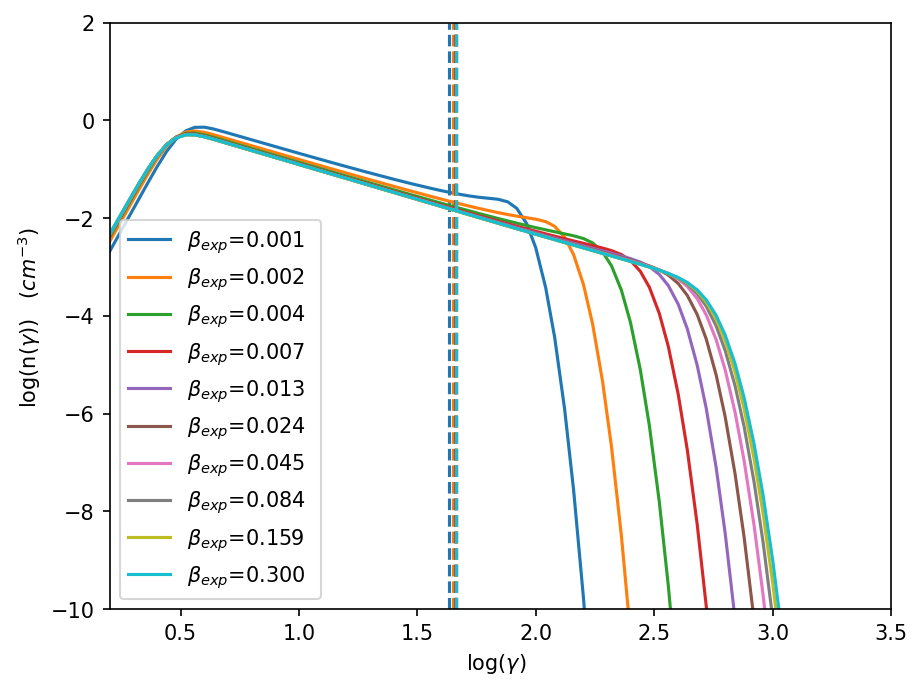

In [7]:
p.fig

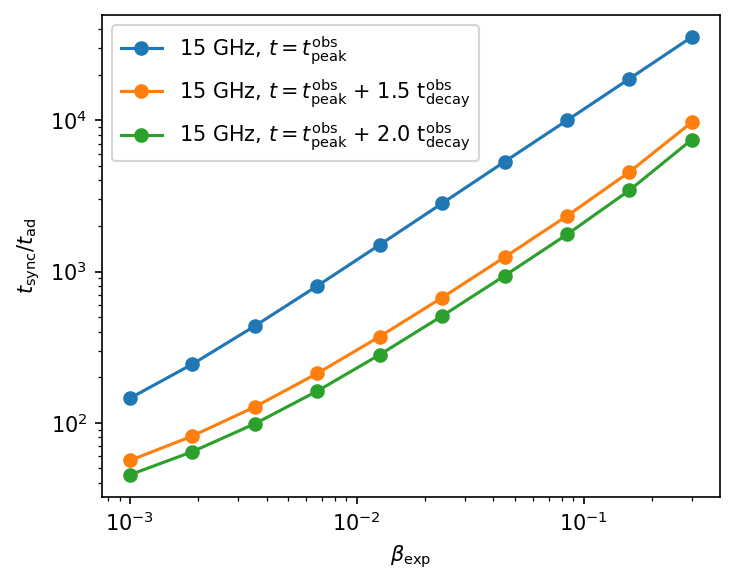

In [8]:
fig=plt.figure(dpi=150,figsize=(5,4))
ax=fig.add_subplot()
ax.loglog(beta_exp,t_S/t_ad,'o-',label=r'15 GHz, $t= t^{\rm obs}_{\rm peak}$')
ax.loglog(beta_exp,t_S_1/t_ad_1,'o-',label=r'15 GHz, $t=t^{\rm obs}_{\rm peak}$ + %1.1f t$^{\rm obs}_{\rm decay}$'%t_factor)
ax.loglog(beta_exp,t_S_2/t_ad_2,'o-',label=r'15 GHz, $t=t^{\rm obs}_{\rm peak}$ + %1.1f t$^{\rm obs}_{\rm decay}$'%t_factor_1)

ax.set_xlabel(r'$\beta_{\rm exp}$')
ax.set_ylabel(r'$t_{\rm sync}/t_{\rm ad}$')
ax.legend()
plt.tight_layout()

In [9]:
fig.savefig('temp_ev_analysis_beta_exp_trends/cooling_ratios.pdf')

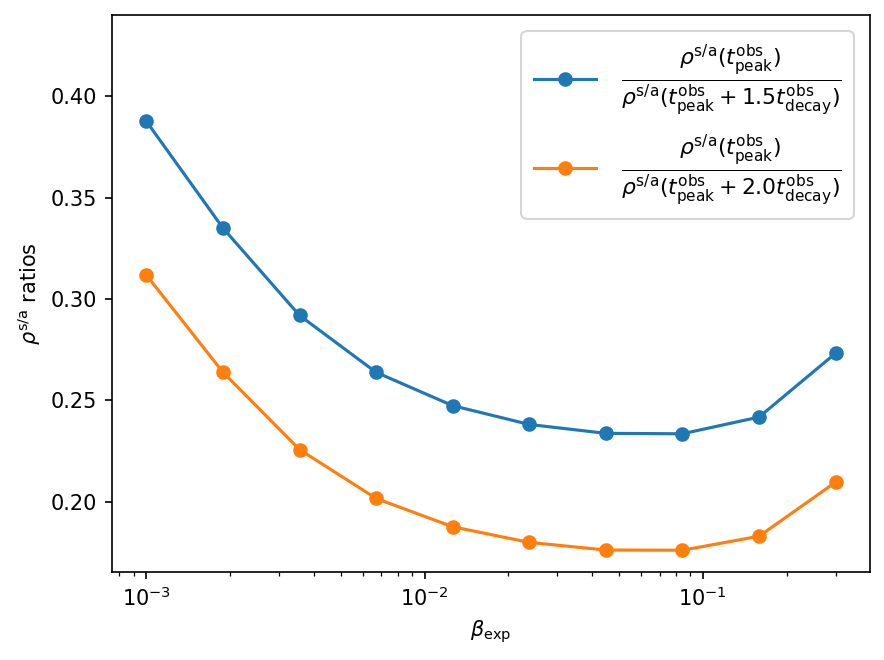

In [10]:
fig=plt.figure(dpi=150,figsize=(6,4.5))
ax=fig.add_subplot()
y1=t_S/t_ad
y2=t_S_1/(t_ad_1)
ax.semilogx(beta_exp,y2/y1,'o-',label=r'$\frac{\rho^{\rm s/a}(t^{\rm obs}_{\rm peak})}{\rho^{\rm s/a}(t^{\rm obs}_{\rm peak} +%1.1f t^{\rm obs}_{\rm decay})}$'%t_factor)
np.save('temp_ev_analysis_beta_exp_trends/beta_exp_cooling_ratio_t_1.5.npy', np.column_stack((beta_exp,y2/y1)))

y1=t_S/t_ad
y2=t_S_2/(t_ad_2)
ax.semilogx(beta_exp,y2/y1,'o-',label=r'$\frac{\rho^{\rm s/a}(t^{\rm obs}_{\rm peak})}{\rho^{\rm s/a}(t^{\rm obs}_{\rm peak} +%1.1f t^{\rm obs}_{\rm decay})}$'%t_factor_1)
np.save('temp_ev_analysis_beta_exp_trends/beta_exp_cooling_ratio_t_2.0.npy', np.column_stack((beta_exp,y2/y1)))

ax.set_xlabel(r'$\beta_{\rm exp}$')
ax.set_ylabel(r'$\rho^{\rm s/a}$ ratios')
ax.legend(fontsize=15)
ax.set_ylim(None,0.44)
plt.tight_layout()


In [11]:
fig.savefig('temp_ev_analysis_beta_exp_trends/cooling_ratios_time_tp_1.5tp.pdf')
plt.tight_layout()

<Figure size 432x288 with 0 Axes>